In [130]:
# for general dataframe editing
import pandas as pd
import numpy as np

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for pca and pcr
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from numpy.linalg import eig
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model

In [131]:
# import data
data = pd.read_csv('superconduct/train.csv')
data_elements = pd.read_csv('superconduct/unique_m.csv')

# look at dataset dimensions and first few observations
print(data.shape)
print(data_elements.shape)
data.head()

(21263, 82)
(21263, 88)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [132]:
no_elements = data.iloc[:,0]
critical_temp = data.iloc[:,81]
atomic_mass = pd.concat([data.iloc[:,1:10 ],critical_temp],axis=1)
fie = pd.concat([data.iloc[:,1:10 ],critical_temp],axis=1) 
atomic_radius = pd.concat([data.iloc[:,21:30],critical_temp],axis=1)  
density = pd.concat([data.iloc[:,31:40],critical_temp],axis=1) 
electron_aff = pd.concat([data.iloc[:,41:50],critical_temp],axis=1) 
fusion_heat =pd.concat([data.iloc[:,51:60],critical_temp],axis=1)  
thermal_cond =pd.concat([data.iloc[:,61:70],critical_temp],axis=1)  
valance =pd.concat([data.iloc[:,71:80],critical_temp],axis=1)


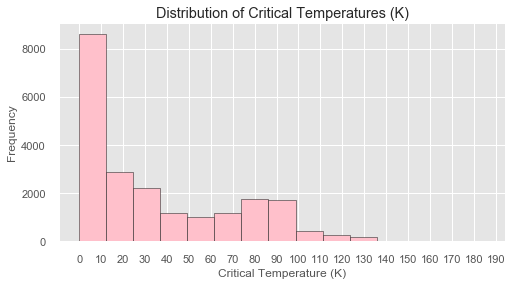

In [229]:
# looking at distribution of response variable
# setting plot style similar to R's ggplot
plt.style.use('ggplot')

# setting size of the plot
plt.figure(figsize = (8,4))

# plotting a histogram
plt.hist(data['critical_temp'].values, bins = 15,color='pink',
        edgecolor = 'k')
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.title('Distribution of Critical Temperatures (K)')
plt.xticks(np.arange(0, 200, step = 10));

In [134]:
ddf=data.copy()
ddf['K']=np.zeros(len(ddf.critical_temp))

ddf.loc[ddf.critical_temp<=22,'K'] = 'Group1'
ddf.loc[(ddf.critical_temp>22) & (ddf.critical_temp<46),'K'] = 'Group2'
ddf.loc[(ddf.critical_temp>=46) & (ddf.critical_temp<70),'K'] = 'Group3'
ddf.loc[(ddf.critical_temp>=70) & (ddf.critical_temp<92),'K'] = 'Group4'
ddf.loc[(ddf.critical_temp>=92) & (ddf.critical_temp<116),'K'] = 'Group5'
ddf.loc[(ddf.critical_temp>=116),'K'] = 'Group6'

ddf

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,K
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00,Group2
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00,Group2
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00,Group1
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00,Group1
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00,Group2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44,Group1
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10,Group6
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98,Group1
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84,Group1


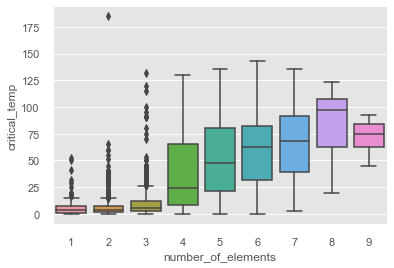

In [135]:
sns.boxplot(x="number_of_elements",y="critical_temp", data=data)

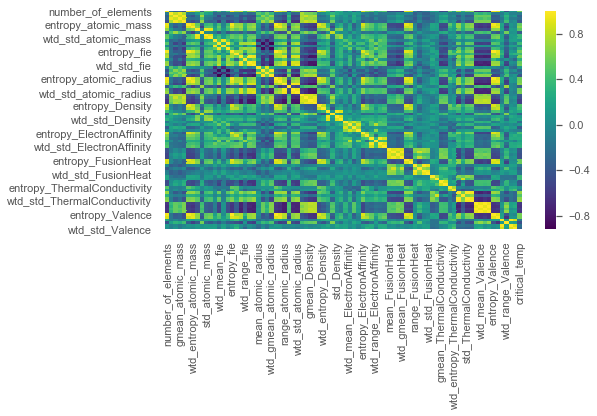

In [136]:
corr_mat = data.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_mat, cmap = 'viridis')

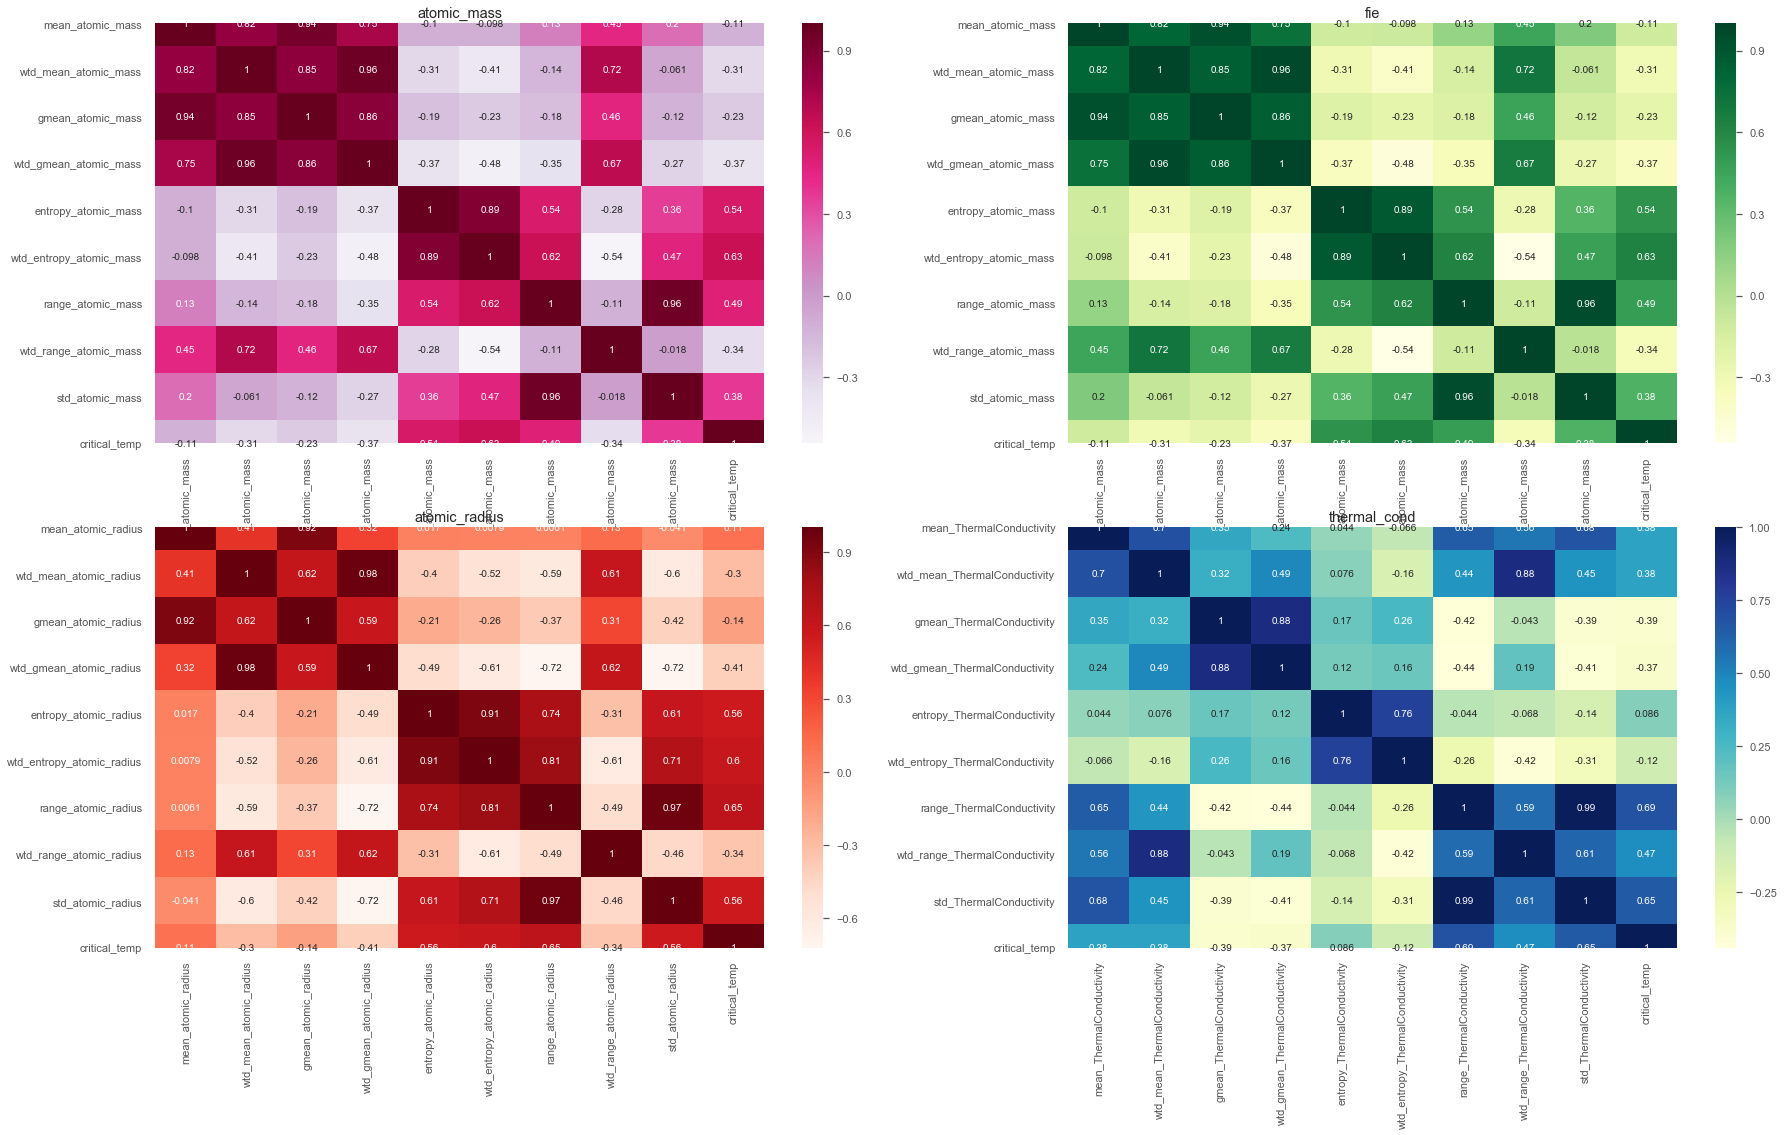

In [137]:
plt.figure(figsize=(30,17))
ax1 = plt.subplot(2,2,1)
plt.title('atomic_mass')
sns.heatmap(atomic_mass.corr(), annot = True,cmap= "PuRd")

ax2 = plt.subplot(2,2,2)
plt.title('fie')
sns.heatmap(fie.corr(),annot = True,cmap="YlGn")

ax3 = plt.subplot(2,2,3)
plt.title('atomic_radius')
sns.heatmap(atomic_radius.corr(),annot = True,cmap="Reds")

ax3 = plt.subplot(2,2,4)
plt.title('thermal_cond')
sns.heatmap(thermal_cond.corr(),annot = True,cmap="YlGnBu")

plt.show()

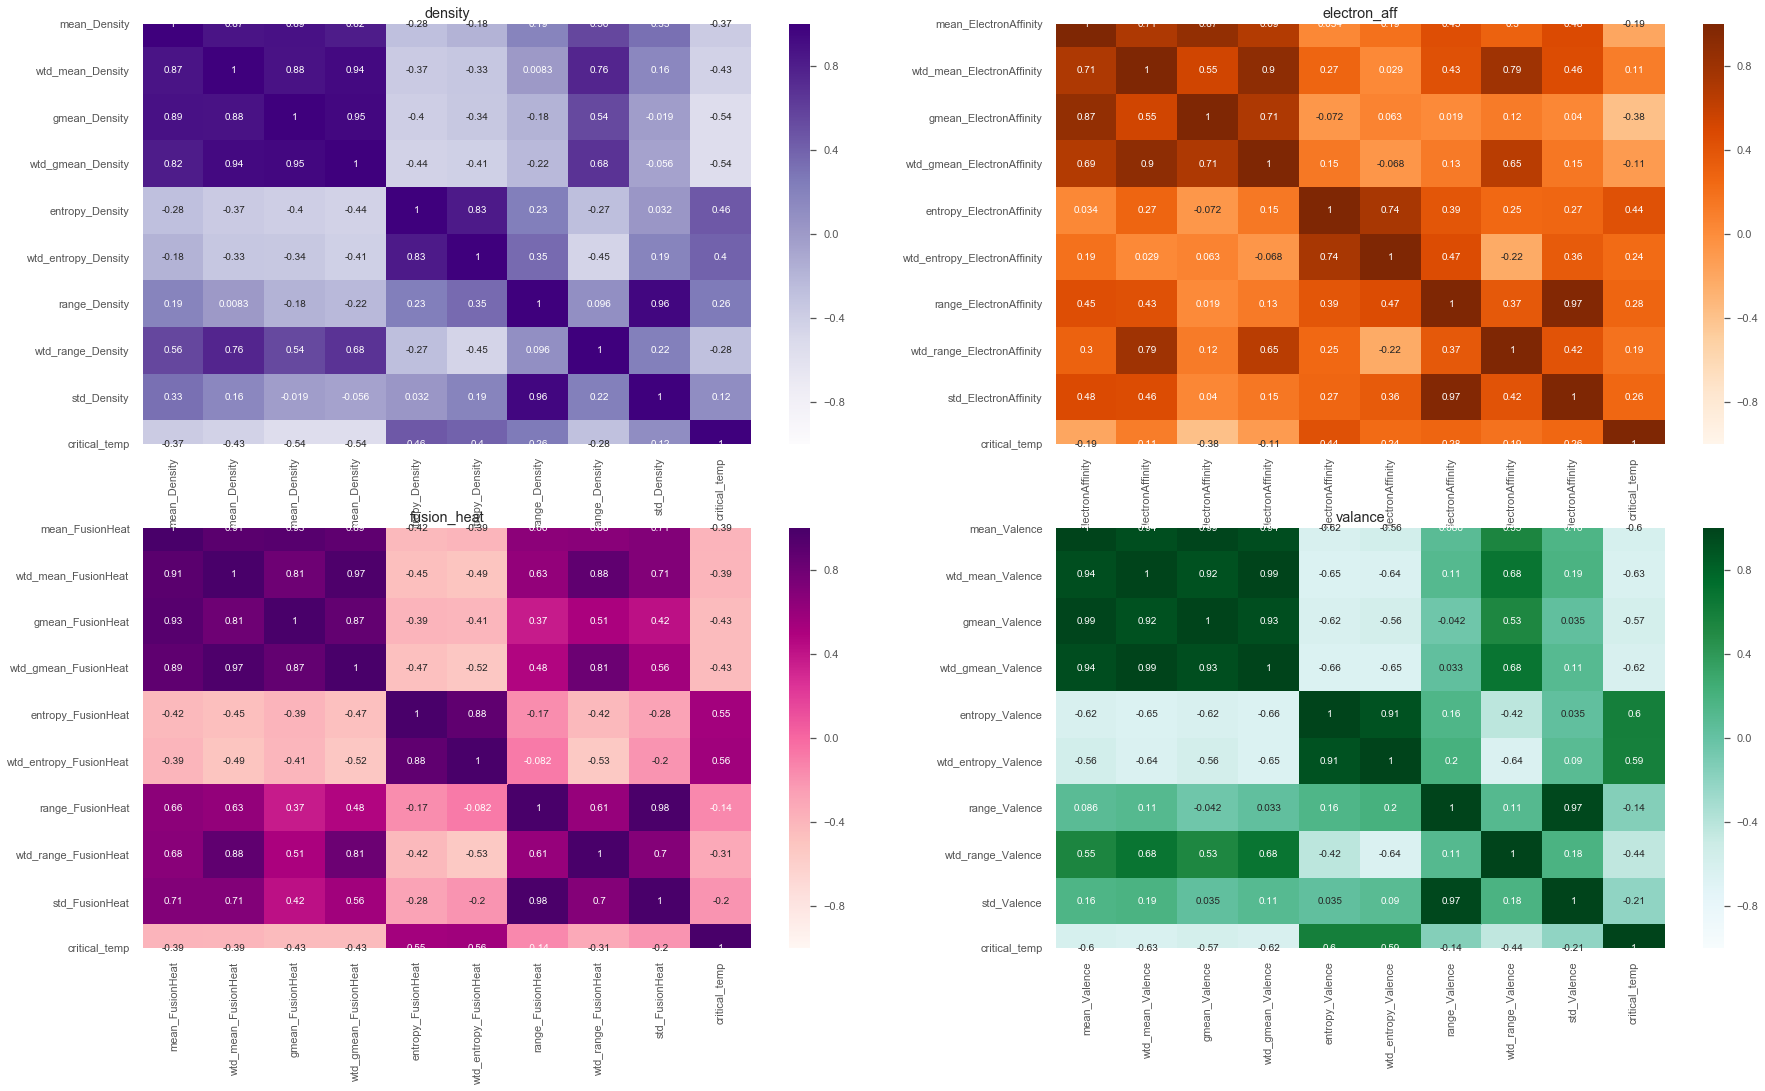

In [138]:
plt.figure(figsize=(30,17))
ax1 = plt.subplot(2,2,1)
plt.title('density')
sns.heatmap(density.corr(),annot = True,vmin=-1, vmax=1, center= 0, cmap= 'Purples')

ax2 = plt.subplot(2,2,2)
plt.title('electron_aff')
sns.heatmap(electron_aff.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap="Oranges")

ax3 = plt.subplot(2,2,3)
plt.title('fusion_heat')
sns.heatmap(fusion_heat.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap='RdPu')

ax3 = plt.subplot(2,2,4)
plt.title('valance')
sns.heatmap(valance.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap="BuGn")
plt.show()

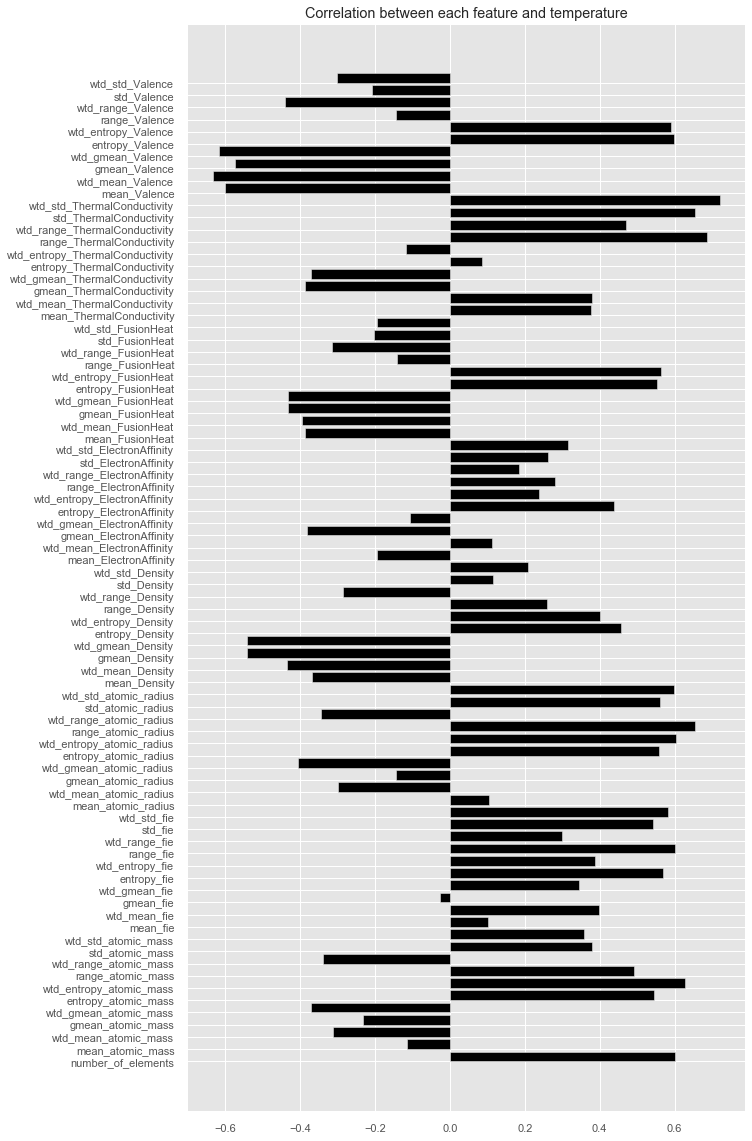

In [163]:
df=data.copy()
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']
correlation = {}
for x in X.columns:
    correlation[x] = np.corrcoef(X[x],y)[0,1]
correlations = pd.DataFrame.from_dict(correlation,orient='index').reset_index()
correlations.rename(columns={'index':'Name',0:'Correlation coefficient'},inplace=True)
plt.figure(figsize=(10,20))
plt.barh(correlations['Name'],correlations['Correlation coefficient'],align='edge',color="black")
plt.title('Correlation between each feature and temperature')
plt.show()


## multicollinearity

In [205]:
# VIF to detect multicollinearity
X = data.drop(['critical_temp'], axis = 1)
vif = pd.DataFrame()
vif["VIF"] = np.linalg.inv(X.corr()).diagonal()
vif["features"] = X.columns
vif

,VIF,features
0,79.644423,number_of_elements
1,414.277383,mean_atomic_mass
2,818.370293,wtd_mean_atomic_mass
3,444.203673,gmean_atomic_mass
4,879.861538,wtd_gmean_atomic_mass
...,...,...
76,307.311308,wtd_entropy_Valence
77,56.759455,range_Valence
78,26.150907,wtd_range_Valence
79,96.823865,std_Valence


## Feature Selection 

Now remove all low variance columns - ones for which 95% of the time they have the same value.

Dropping features that varied 5% of less across all rows (using VarianceThreshold)

In [233]:
#Now remove all low variance columns - ones for which 95% of the time they have the same value.
# remove all columns that have a very small variance
threshold=0.05 #this gets rid of features which are the same value 95% of the time
df=data.copy()

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold).fit(df)
df = pd.DataFrame(selector.transform(df),columns=df.columns[selector.get_support()])
df.shape

(21263, 82)

In [234]:

#drop any duplicate features
df = df.transpose().drop_duplicates(keep='first').transpose()
print(df.shape)

(21263, 82)


In [235]:
df=data.copy()

#Now drop any correlated features
correlation_matrix = df.corr() 
mutually_correlated_features = set()  
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            if colname!='critical_temp':
                mutually_correlated_features.add(colname)
print(len(mutually_correlated_features))
df.drop(mutually_correlated_features,axis=1,inplace=True)
df.shape

54


(21263, 28)

 drop any mutually correlated features.

In [236]:
#This gets rid of features that have a absolute correlation with the target less than 0.1
#Now get rid of any features that have a very low correlation (abs<0.1) with the target variable, critical_temp.
correlation_threshhold = 0.1

corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature','critical_temp':'corr'}).loc[1:]

low_correlated_features = list(corr[np.abs(corr['corr'])<=correlation_threshhold]['feature'])
df.drop(low_correlated_features,axis=1,inplace=True)
df.shape

(21263, 27)

In [237]:
for col in df.columns: 
    print(col) 

number_of_elements
mean_atomic_mass
range_atomic_mass
wtd_range_atomic_mass
mean_fie
wtd_mean_fie
wtd_entropy_fie
range_fie
wtd_range_fie
mean_atomic_radius
wtd_range_atomic_radius
mean_Density
range_Density
mean_ElectronAffinity
wtd_mean_ElectronAffinity
range_ElectronAffinity
wtd_range_ElectronAffinity
mean_FusionHeat
range_FusionHeat
mean_ThermalConductivity
wtd_mean_ThermalConductivity
gmean_ThermalConductivity
wtd_entropy_ThermalConductivity
range_ThermalConductivity
range_Valence
wtd_range_Valence
critical_temp


In [248]:
df['group']=np.zeros(len(df.critical_temp))


df.loc[(df.critical_temp<46),'group'] = 'low'
df.loc[(df.critical_temp>=46) & (df.critical_temp<92),'group'] = 'mid'
df.loc[(df.critical_temp>=92),'group'] = 'high'

df9=df.drop(['critical_temp'], axis = 1)


#group=df.iloc[:,27]
#lut = dict(zip(group.unique(), "rbg"))
#row_colors = group.map(lut)
#sns.clustermap(df9,standard_scale=1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

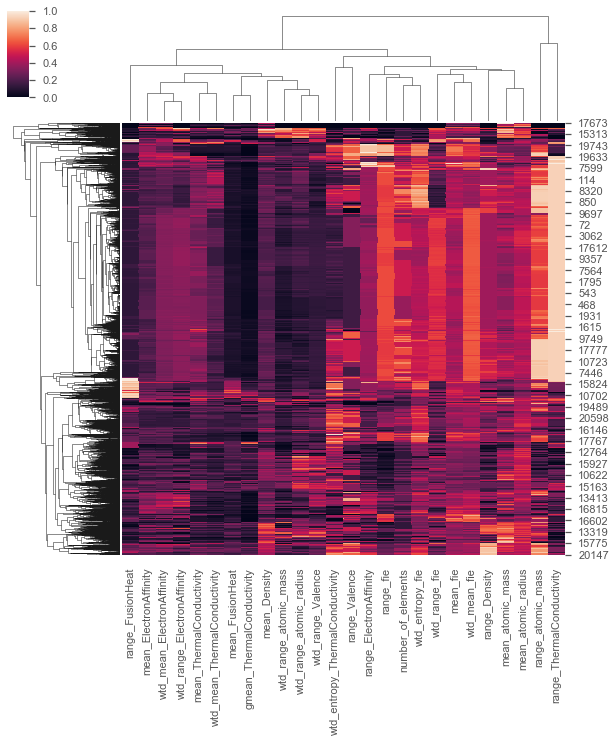

In [253]:
df9=df.drop(['critical_temp'], axis = 1)
df9=df9.drop(['group'], axis = 1)
sns.clustermap(df9,standard_scale=1)

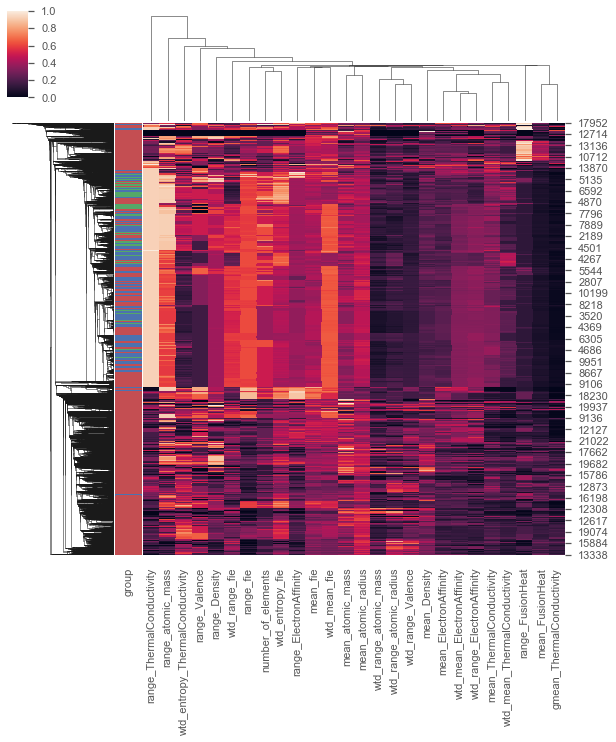

In [261]:
df9
df9['group']=np.zeros(len(df9.wtd_range_Valence))


df9.loc[(df1.critical_temp<46),'group'] = 'low'
df9.loc[(df1.critical_temp>=46) & (df1.critical_temp<92),'group'] = 'mid'
df9.loc[(df1.critical_temp>=92),'group'] = 'high'

group=df9.iloc[:,26]
lut = dict(zip(group.unique(), "rbg"))
row_colors = group.map(lut)
df9=df9.drop(['group'], axis = 1)
sns.clustermap(df9, row_colors=row_colors,method="single",standard_scale=1)

In [262]:
lut

{'low': 'r', 'mid': 'b', 'high': 'g'}

In [144]:
df1=data.copy()
df1['group']=np.zeros(len(df1.critical_temp))


df1.loc[(df1.critical_temp<46),'group'] = 'low'
df1.loc[(df1.critical_temp>=46) & (df1.critical_temp<92),'group'] = 'mid'
df1.loc[(df1.critical_temp>=92),'group'] = 'high'

df1.shape

(21263, 83)

In [145]:
df2=df1.copy()
correlations.sort_values(by=['Correlation coefficient'], inplace=True,ascending=False)
correlations.iloc[0:10,:]
df2=df2[['wtd_std_ThermalConductivity','range_ThermalConductivity','range_atomic_radius',
    'std_ThermalConductivity','wtd_entropy_atomic_mass','wtd_entropy_atomic_radius',
    'number_of_elements','range_fie','wtd_std_atomic_radius','entropy_Valence','group']]


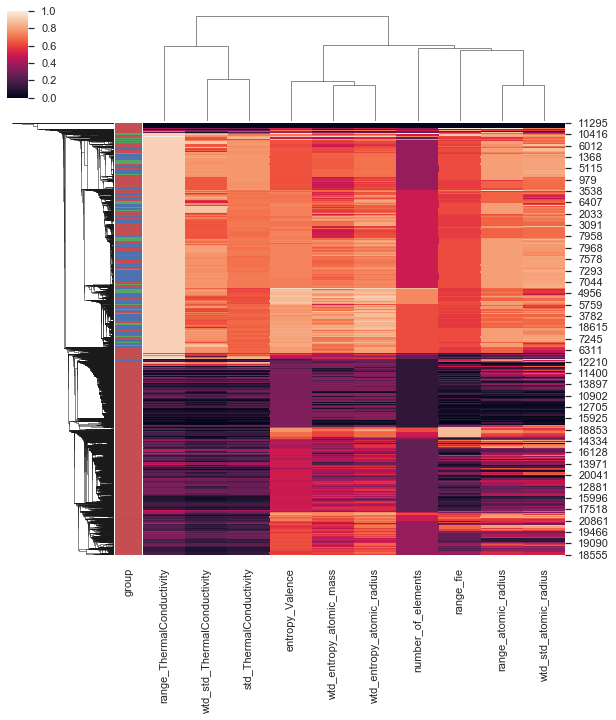

In [62]:
group=df2.iloc[:,10]
lut = dict(zip(group.unique(), "rbg"))
row_colors = group.map(lut)
sns.clustermap(df3, row_colors=row_colors,method="single",standard_scale=1)

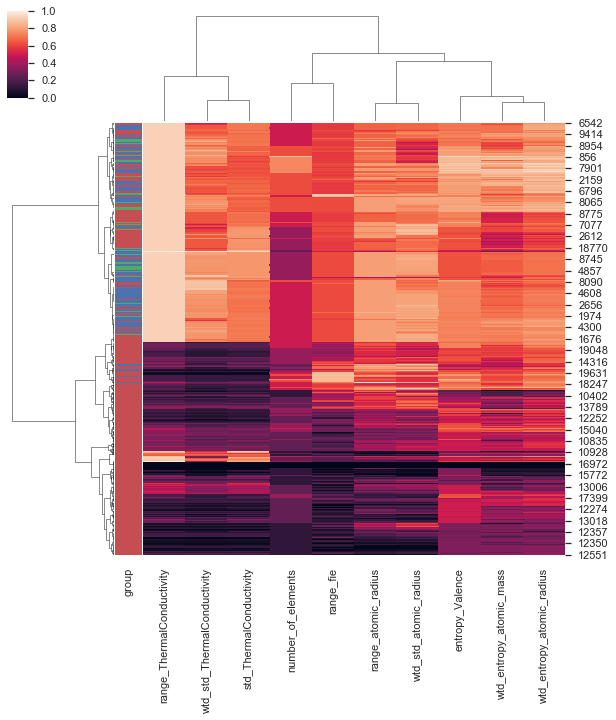

In [63]:
sns.clustermap(df3, row_colors=row_colors,method="ward",standard_scale=1)


## Split Data into Training and Test Sets
Typically the train test split is 80% training and 20% test. In this case, I chose 6/7th of the data to be training and 1/7th of the data to be in the test set.



In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = data.drop(['critical_temp'], axis = 1)
Y = data["critical_temp"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


## Standardize the Data
The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [147]:
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Principal component analysis (PCA)

PCA to Speed-up Machine Learning Algorithms
One of the most important applications of PCA is for speeding up machine learning algorithms. 

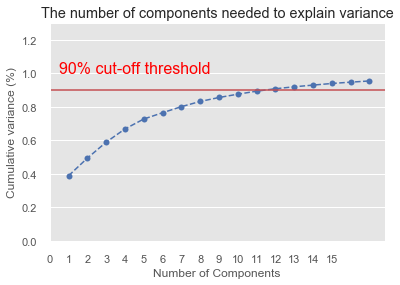

In [148]:
#Typically, we want the explained variance to be between 95–99%. 
#In Scikit-learn we can set it like this:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import KernelPCA

pca = PCA(n_components = 0.95)
pca.fit(x_train)



fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.3)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 1, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [149]:
pca1 = PCA(n_components = 11)
pca1.fit(x_train)
x_train_reduced = pca1.fit_transform(x_train)
x_test_reduced = pca1.fit_transform(x_test)
x_train_reduced.shape

(17010, 11)

In [150]:
print(pca1.explained_variance_ratio_)

[0.39384406 0.10280271 0.09414382 0.07822043 0.05760655 0.03903877
 0.03582438 0.03071241 0.02338201 0.01948765 0.01850802]


In [151]:

df_plot = pd.DataFrame(x_train_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7',
                                               'PC8','PC9','PC10','PC11'])
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-5.254638,-0.250305,-0.308722,0.298316,-0.373292,-0.154432,1.091247,0.101744,1.482276,-0.889314,0.035033
1,-3.944994,-3.184316,0.994213,-1.881270,2.372521,1.460858,-2.738970,1.222285,-0.861000,1.389337,0.124204
2,-1.264888,3.895739,-0.134237,1.798030,-2.890783,0.329747,2.930291,1.327684,1.666752,0.482889,-1.151312
3,11.041218,-2.653769,-2.061311,2.917766,3.982299,1.774278,-0.326895,-3.358451,0.727005,-1.701764,-0.650720
4,3.206338,8.145534,-1.771022,-6.600229,0.457534,0.891670,-1.592436,-0.287035,-1.340459,-2.137505,-1.469387
...,...,...,...,...,...,...,...,...,...,...,...
17005,5.045033,-0.364560,-2.475317,3.331301,4.767148,7.198769,0.001272,0.655077,6.907966,-2.108188,-1.148940
17006,14.216166,1.607140,6.321689,0.087214,-1.962289,1.402712,-0.002417,-4.288879,1.876838,2.110974,-0.152280
17007,-1.864899,-0.671158,1.606305,0.246352,-0.107512,2.720417,-1.110078,1.192398,-1.594888,1.000474,1.230835
17008,-4.130125,-0.023161,1.419241,1.794068,0.102142,1.056256,2.186315,-0.614668,-0.466540,-0.330811,-0.230048


## fit the modle

## MLR

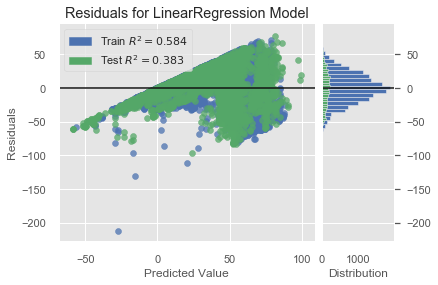

In [264]:

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train_reduced, y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(x_test_reduced)



residuals_plot(regr, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

In [265]:

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, diabetes_y_pred))

Coefficients: 
 [-3.99219323 -1.941134    2.49772055 -1.16125916  2.56485398  3.27119184
 -1.1096712  -0.40282578 -1.98117586  0.109578   -2.9455536 ]
Mean squared error: 746.50
Coefficient of determination: 0.38


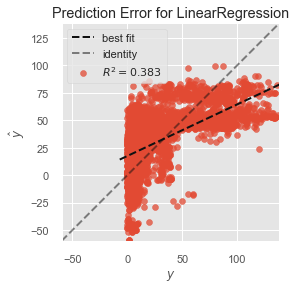

In [266]:
prediction_error(regr, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

## Ridge

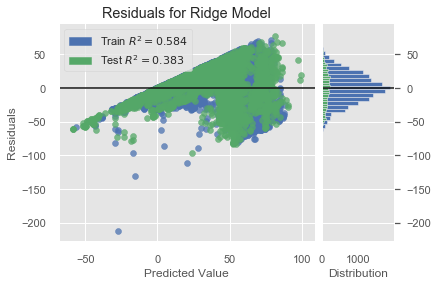

In [267]:

#
# Instantiate the linear model and visualizer
model1 = linear_model.Ridge(alpha=.5)
model1.fit(x_train_reduced, y_train)

diabetes_y_pred1 = model1.predict(x_test_reduced)




residuals_plot(model1, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

In [268]:
# The coefficients
print('Coefficients: \n', model1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, diabetes_y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, diabetes_y_pred1))


Coefficients: 
 [-3.9921895  -1.9411273   2.49771105 -1.16125383  2.56483827  3.27116038
 -1.1096601  -0.40282108 -1.98114541  0.10957599 -2.94549456]
Mean squared error: 746.50
Coefficient of determination: 0.38


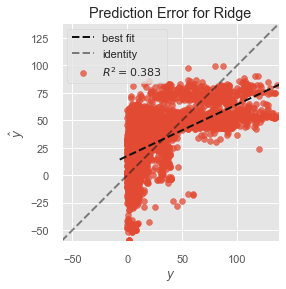

In [269]:
prediction_error(model1, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

## RandomForestRegressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

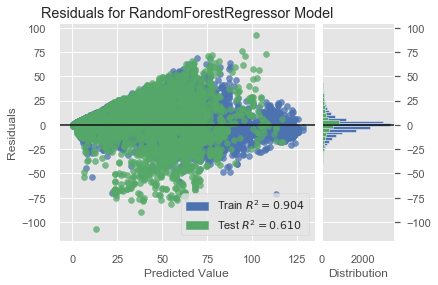

In [270]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate the linear model and visualizer
model2 = RandomForestRegressor(max_depth=10, random_state=0)
model2.fit(x_train_reduced, y_train)

diabetes_y_pred2 = model2.predict(x_test_reduced)




residuals_plot(model2, x_train_reduced, y_train, x_test_reduced, y_test)     
plt.show()

In [271]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, diabetes_y_pred2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, diabetes_y_pred2))

Mean squared error: 471.58
Coefficient of determination: 0.61


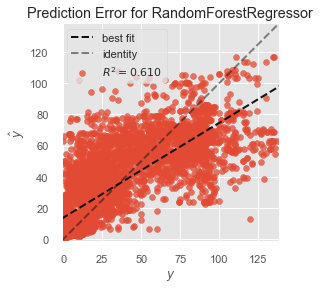

In [272]:
prediction_error(model2, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

## Support Vector Regression
The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See Implementation details for further details.

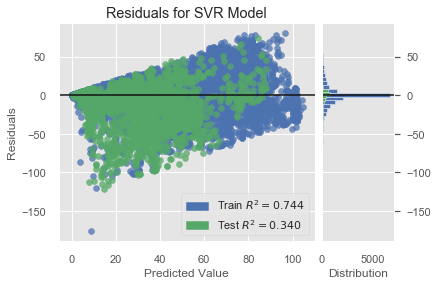

In [273]:
from sklearn import svm



model3 = svm.SVR()
model3.fit(x_train_reduced, y_train)
diabetes_y_pred3 = model3.predict(x_test_reduced)

residuals_plot(model3, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

In [274]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, diabetes_y_pred3))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, diabetes_y_pred3))

Mean squared error: 798.24
Coefficient of determination: 0.34


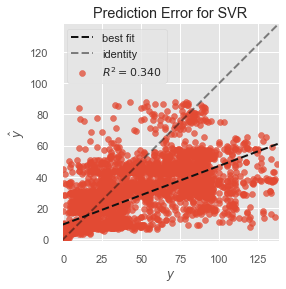

In [276]:
prediction_error(model3, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

## Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

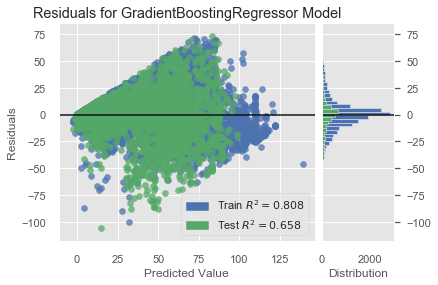

ResidualsPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c48a33a10>,
              hist=True, is_fitted='auto', line_color=None, model=None,
              test_alpha=None, test_color=None, train_alpha=None,
              train_color=None)

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(random_state=0)
model4.fit(x_train_reduced, y_train)
diabetes_y_pred4 = model4.predict(x_test_reduced)




residuals_plot(model4, x_train_reduced, y_train, x_test_reduced, y_test)


In [278]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, diabetes_y_pred4))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, diabetes_y_pred4))

Mean squared error: 413.49
Coefficient of determination: 0.66


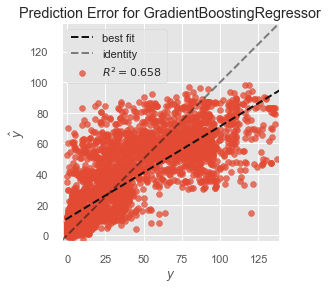

In [279]:
prediction_error(model4, x_train_reduced, y_train, x_test_reduced, y_test)
plt.show()

In [206]:
X2 = df.drop(['critical_temp'], axis = 1)
Y2=df1['group']
x_train2,x_test2,y_train2,y_tes2t=train_test_split(X2,Y2,test_size=0.2)
# Fit on training set only.
scaler.fit(x_train2)
# Apply transform to both the training set and the test set.
x_train2 = scaler.transform(x_train2)
x_test2 = scaler.transform(x_test2)